In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")
sns.set(font_scale=1.2)

In [5]:
df = pd.read_csv("merged_data.csv")


In [6]:
df.columns = df.columns.str.strip()


In [7]:
df['datetime'] = pd.to_datetime(df['aqi_datetime'], dayfirst=True)
df.set_index('datetime', inplace=True)


In [8]:
df['weather_datetime'] = pd.to_datetime(df['weather_datetime'], errors='coerce')

C:\Users\Siddharth Ramgundam\AppData\Local\Temp\ipykernel_15168\1385456.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weather_datetime'] = pd.to_datetime(df['weather_datetime'], errors='coerce')


In [9]:
print("----- Dataset Info -----")
print(df.info())

----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2025-09-18 12:00:00 to 2025-09-18 15:00:00
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   city                 32 non-null     object        
 1   aqi                  32 non-null     int64         
 2   pm25                 32 non-null     int64         
 3   pm10                 27 non-null     float64       
 4   no2                  26 non-null     float64       
 5   so2                  22 non-null     float64       
 6   o3                   26 non-null     float64       
 7   co                   26 non-null     float64       
 8   aqi_datetime         32 non-null     object        
 9   date                 32 non-null     object        
 10  temperature          32 non-null     float64       
 11  humidity             32 non-null     int64         
 12  pressure             32 non-nul

In [10]:
print("\n----- Missing Values (%) -----")
print(df.isnull().mean()*100)


----- Missing Values (%) -----
city                    0.000
aqi                     0.000
pm25                    0.000
pm10                   15.625
no2                    18.750
so2                    31.250
o3                     18.750
co                     18.750
aqi_datetime            0.000
date                    0.000
temperature             0.000
humidity                0.000
pressure                0.000
wind_speed              0.000
clouds                  0.000
weather_description     0.000
weather_datetime        0.000
country                 0.000
dtype: float64


In [11]:
print("\n----- Duplicate Rows -----")
print("Number of duplicates:", df.duplicated().sum())


----- Duplicate Rows -----
Number of duplicates: 0


In [12]:
print("\n----- Summary Statistics -----")
print(df.describe())


----- Summary Statistics -----
              aqi        pm25       pm10        no2        so2         o3  \
count   32.000000   32.000000  27.000000  26.000000  22.000000  26.000000   
mean    47.937500   46.812500  24.851852  10.076923   2.600000  15.584615   
min     15.000000    9.000000   3.000000   1.800000   0.300000   0.100000   
25%     24.750000   21.000000  10.500000   4.600000   0.650000   6.875000   
50%     38.000000   38.000000  19.000000   6.000000   1.600000  12.500000   
75%     62.750000   62.750000  31.500000  12.725000   3.500000  23.275000   
max    127.000000  127.000000  64.000000  39.100000  14.800000  41.100000   
std     30.467262   31.391839  17.780075   8.856108   3.109739  11.587362   

              co  temperature   humidity     pressure  wind_speed      clouds  \
count  26.000000    32.000000  32.000000    32.000000   32.000000   32.000000   
mean    2.630769    21.064062  74.906250  1015.437500    3.425937   50.718750   
min     0.100000    12.060000  

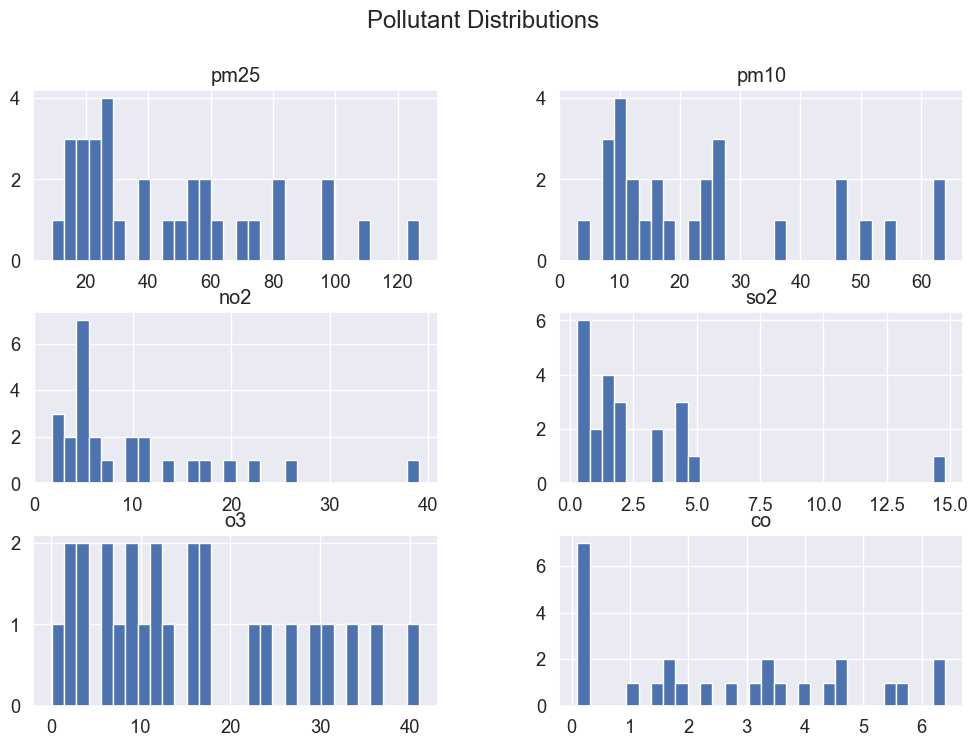

In [13]:
# Distribution Analysis
# Pollutants
pollutants = ['pm25', 'pm10', 'no2', 'so2', 'o3', 'co']
df[pollutants].hist(bins=30, figsize=(12,8))
plt.suptitle("Pollutant Distributions")
plt.show()

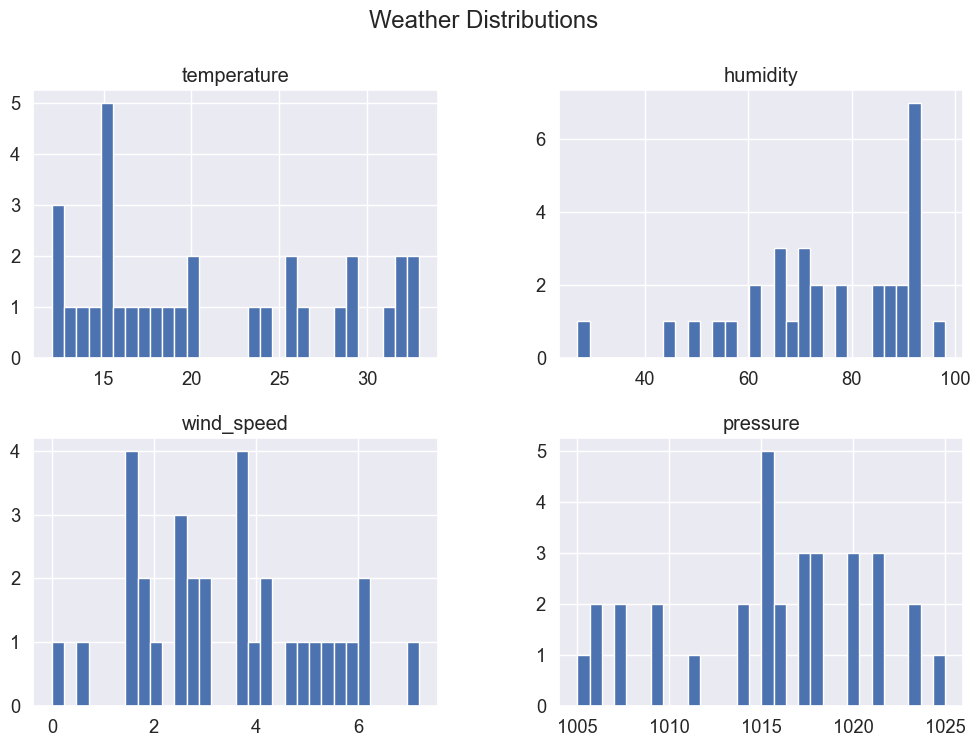

In [14]:

# Weather parameters
weather = ['temperature','humidity','wind_speed','pressure']
df[weather].hist(bins=30, figsize=(12,8))
plt.suptitle("Weather Distributions")
plt.show()

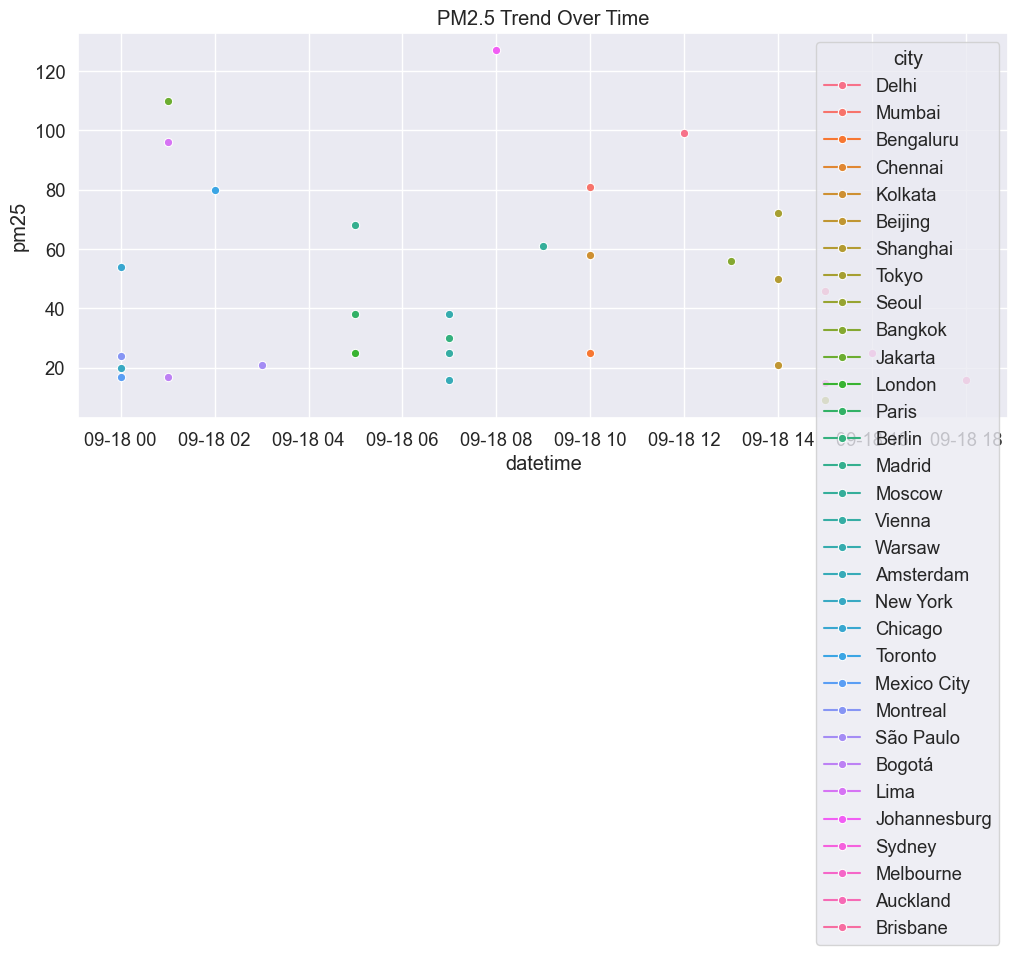

In [15]:
# Time-Series Trends
# PM2.5 trend over time
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x=df.index, y='pm25', hue='city', marker='o')
plt.title("PM2.5 Trend Over Time")
plt.show()

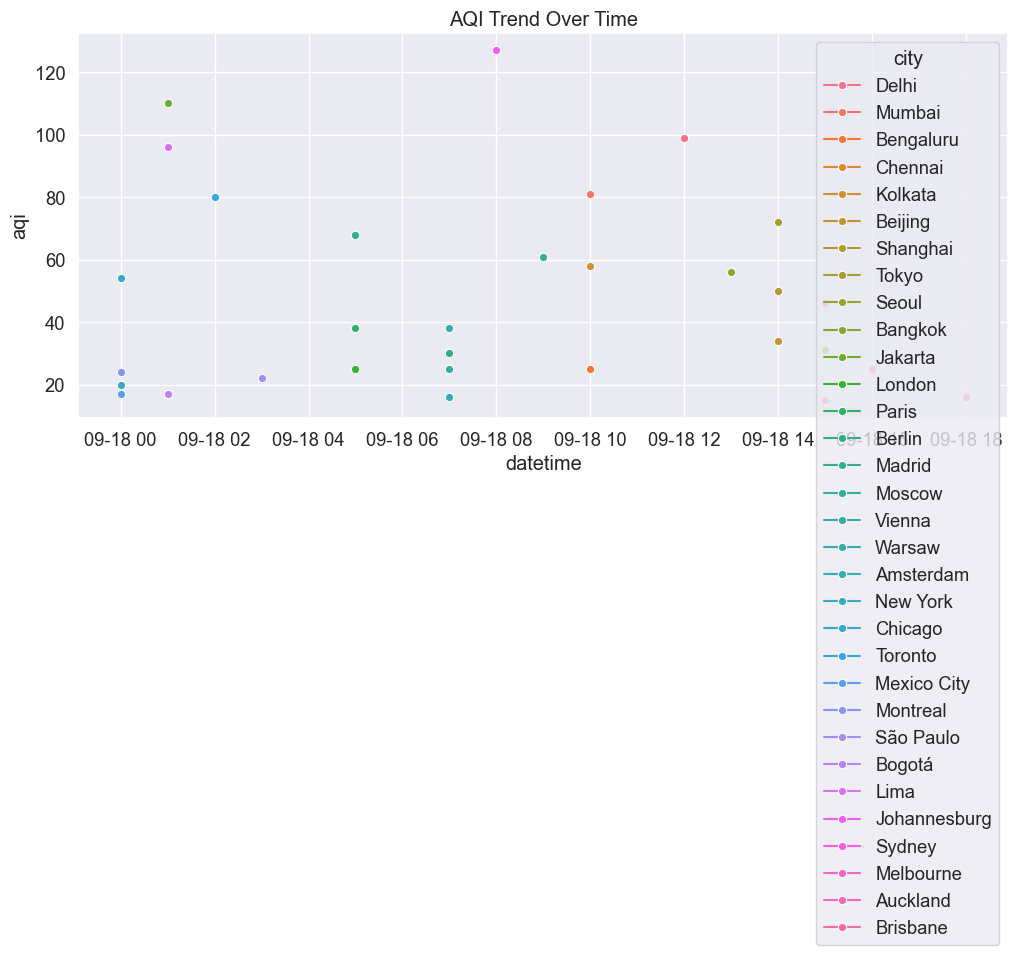

In [16]:
# AQI trend over time
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x=df.index, y='aqi', hue='city', marker='o')
plt.title("AQI Trend Over Time")
plt.show()

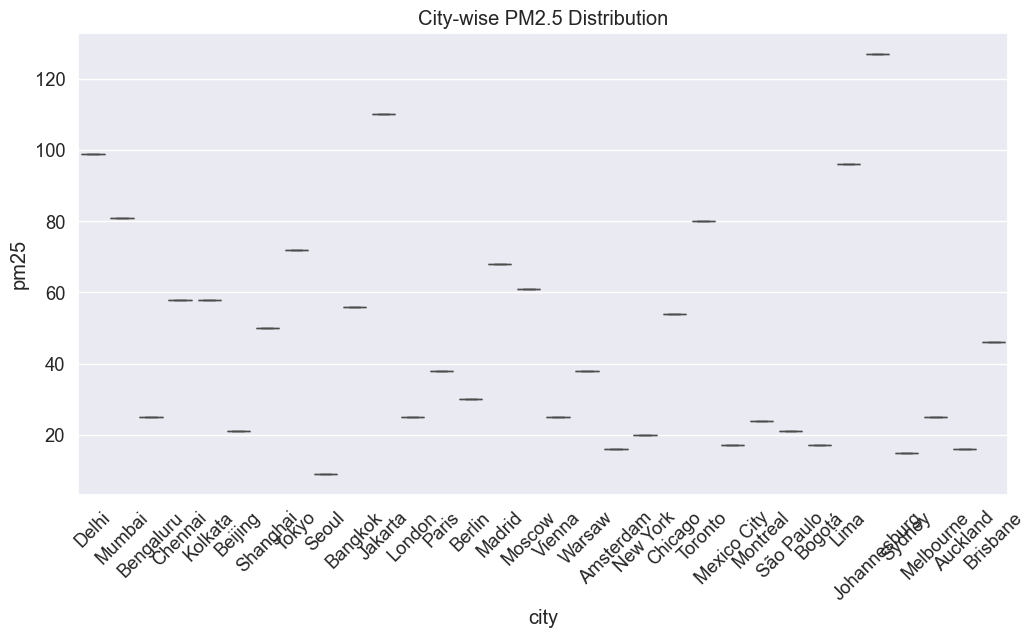

In [17]:
#City-wise Comparisons
# Boxplot of PM2.5 per city
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='city', y='pm25')
plt.title("City-wise PM2.5 Distribution")
plt.xticks(rotation=45)
plt.show()


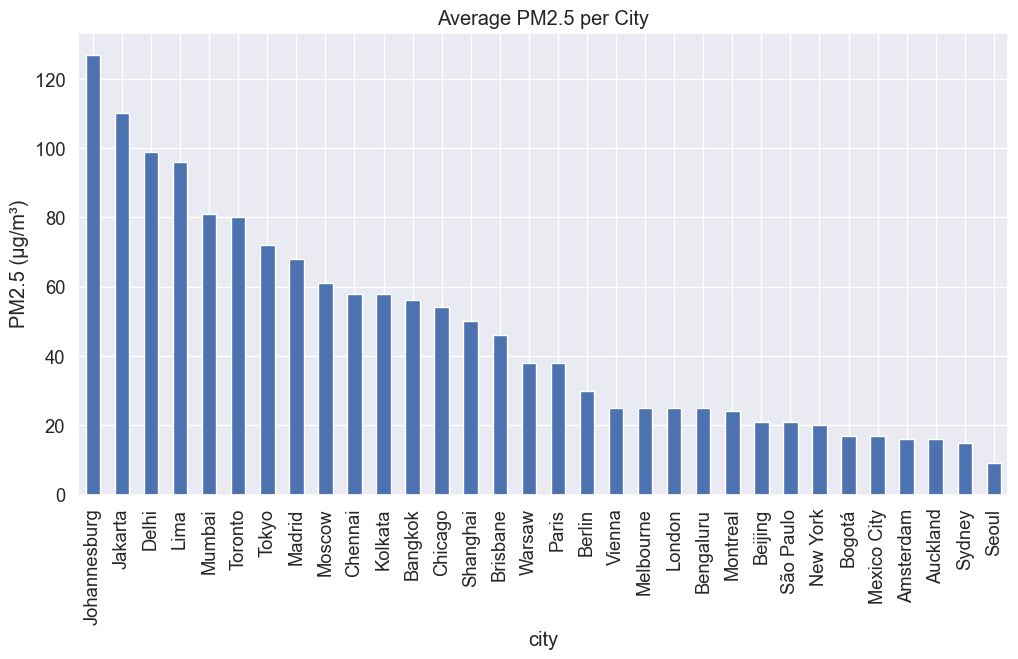

In [18]:
# Average PM2.5 per city
avg_pm25 = df.groupby('city')['pm25'].mean().sort_values(ascending=False)
avg_pm25.plot(kind='bar', figsize=(12,6), title="Average PM2.5 per City")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

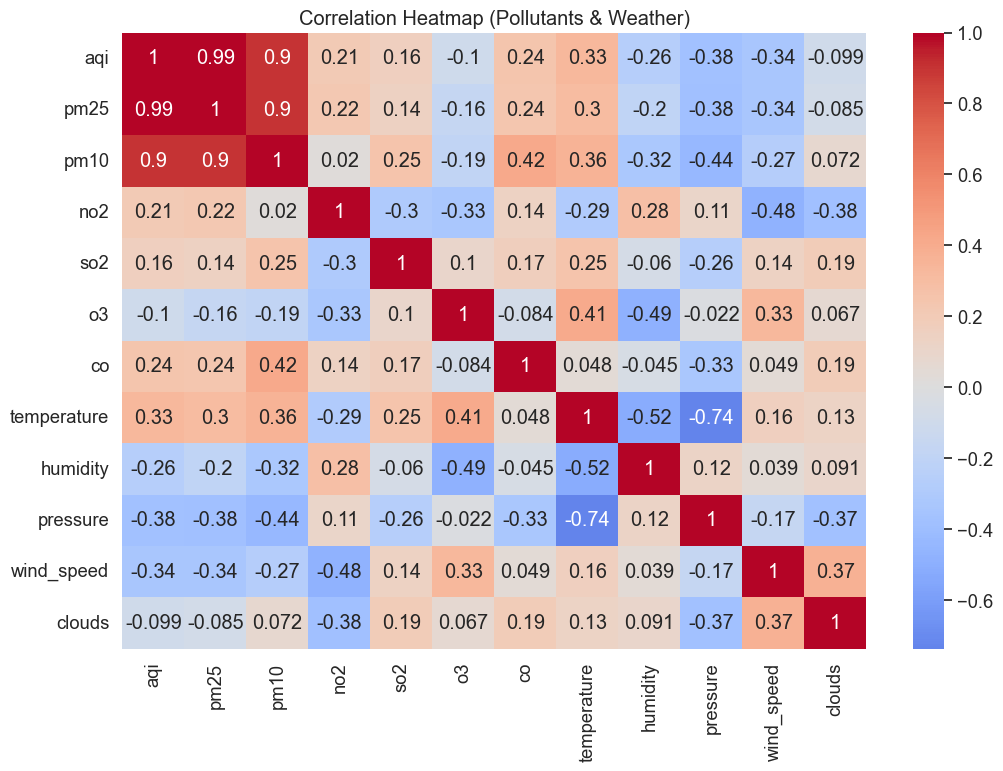

In [20]:
#Correlation Analysis
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Pollutants & Weather)")
plt.show()

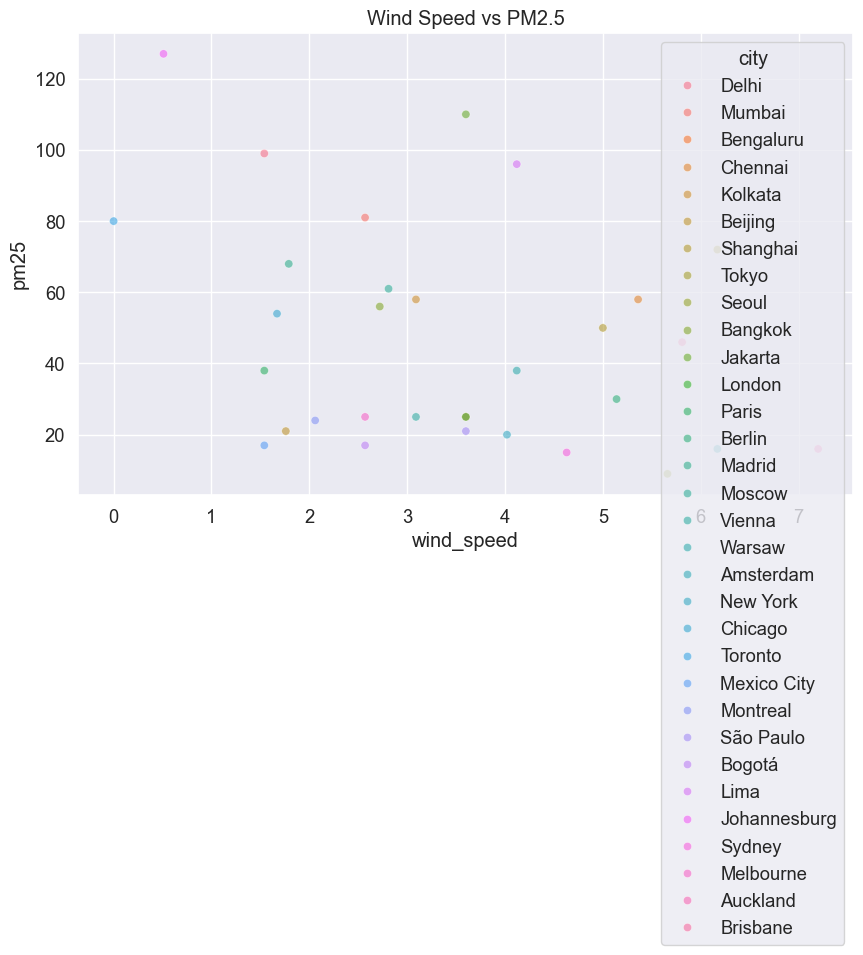

In [21]:
# Scatter plot: Wind speed vs PM2.5
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='wind_speed', y='pm25', hue='city', alpha=0.6)
plt.title("Wind Speed vs PM2.5")
plt.show()

In [23]:
# Health Risk Indicators
# WHO PM2.5 daily safe limit = 25 µg/m³
df['unhealthy_pm25'] = df['pm25'] > 25

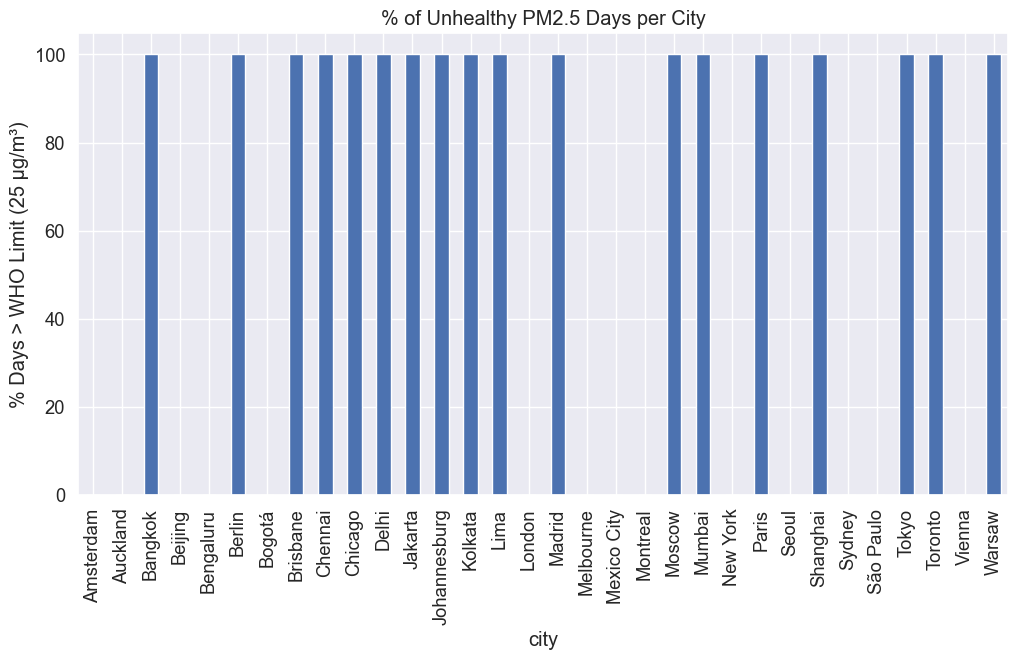

In [24]:
# Percent of unhealthy PM2.5 days per city
risk = df.groupby('city')['unhealthy_pm25'].mean()*100
risk.plot(kind='bar', figsize=(12,6), title="% of Unhealthy PM2.5 Days per City")
plt.ylabel("% Days > WHO Limit (25 µg/m³)")
plt.show()


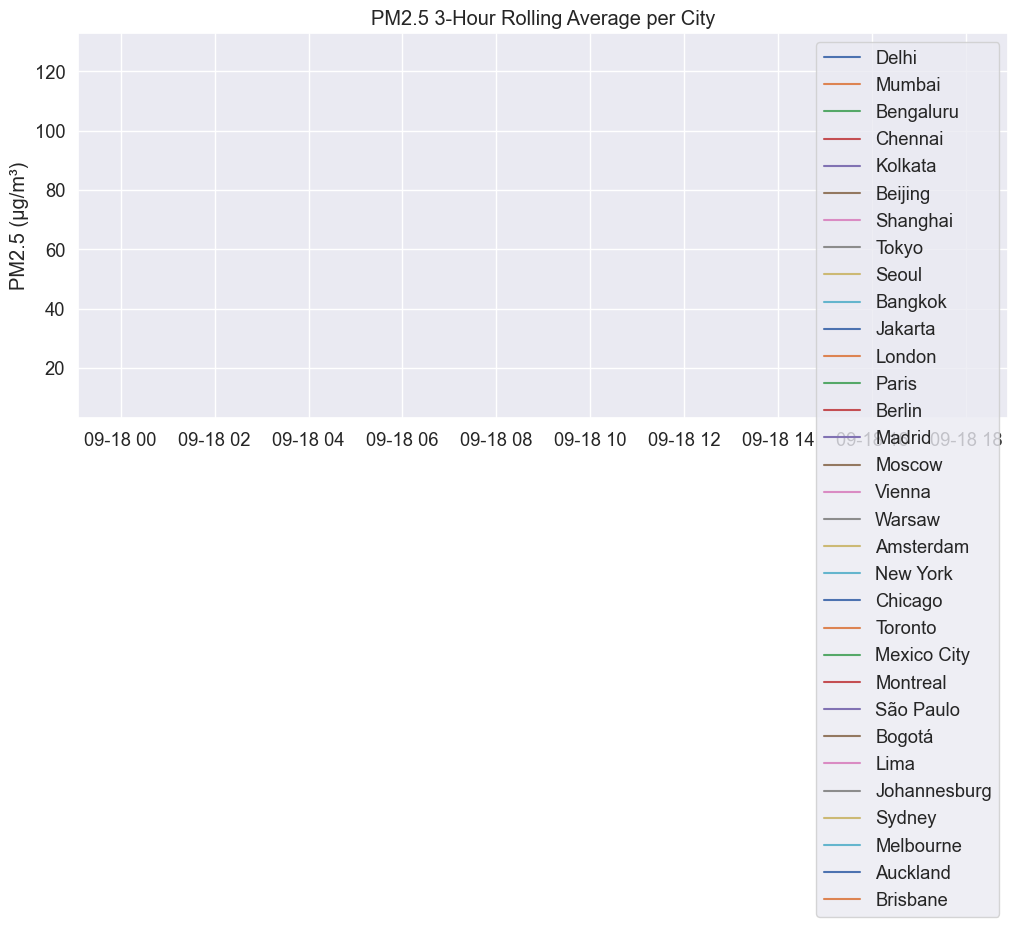

In [25]:
#  Rolling Average / Anomaly Detection
df['pm25_rolling'] = df.groupby('city')['pm25'].transform(lambda x: x.rolling(3, min_periods=1).mean())

plt.figure(figsize=(12,5))
for city in df['city'].unique():
    subset = df[df['city'] == city]
    plt.plot(subset.index, subset['pm25_rolling'], label=city)
plt.title("PM2.5 3-Hour Rolling Average per City")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend(loc='upper right')
plt.show()